### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Read the Data

In [12]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/bitcoin_cash_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000"
1,2017-09-04,608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000"
2,2017-09-03,578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000"
3,2017-09-02,621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000"
4,2017-09-01,588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000"


In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [20]:
df.count()

Open          45
High          45
Low           45
Close         45
Volume        45
Market Cap    45
dtype: int64

as we can see we have in this file 7 columns and each column has 45 sell

In [24]:
df.describe()

,Open,High,Low,Close
count,45.000000,45.000000,45.000000,45.000000
mean,461.323333,528.302889,412.777556,459.134667
std,155.461942,181.817928,151.387218,154.506075
min,212.180000,223.700000,200.980000,213.150000
25%,321.350000,373.870000,293.100000,319.690000
50%,417.100000,541.660000,364.050000,413.060000
75%,596.190000,645.520000,570.270000,599.630000
max,772.420000,1091.970000,683.940000,754.560000


In [30]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2017-09-05 to 2017-07-23
Data columns (total 6 columns):
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null object
Market Cap    45 non-null object
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


In [54]:
#check if the dataset is duplicated
df.duplicated()

Date
2017-09-05    False
2017-09-04    False
2017-09-03    False
2017-09-02    False
2017-09-01    False
2017-08-31    False
2017-08-30    False
2017-08-29    False
2017-08-28    False
2017-08-27    False
2017-08-26    False
2017-08-25    False
2017-08-24    False
2017-08-23    False
2017-08-22    False
2017-08-21    False
2017-08-20    False
2017-08-19    False
2017-08-18    False
2017-08-17    False
2017-08-16    False
2017-08-15    False
2017-08-14    False
2017-08-13    False
2017-08-12    False
2017-08-11    False
2017-08-10    False
2017-08-09    False
2017-08-08    False
2017-08-07    False
2017-08-06    False
2017-08-05    False
2017-08-04    False
2017-08-03    False
2017-08-02    False
2017-08-01    False
2017-07-31    False
2017-07-30    False
2017-07-29    False
2017-07-28    False
2017-07-27    False
2017-07-26    False
2017-07-25    False
2017-07-24    False
2017-07-23    False
dtype: bool

as we can see the data frame has 45 entries and 7 columns. each column has 45 cell, and there is no missing data, but when we have checked the data frame we found there is missing data but instead "NaN" value, there is "-" in the cells and the previous method concedered them as a string type, so we have to replace the string into NaN .  
* Volume and Market cap data type are object, it should be number. 

In [31]:
# Replacing missing data with NaN
df.replace('-', np.nan,inplace=True)
df[df['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,"65,988,800",NaN
2017-07-31,346.36,347.82,266.19,294.46,"1,075,960",NaN
2017-07-30,385.14,385.14,316.25,345.66,"606,695",NaN
2017-07-29,410.56,423.73,323.73,384.77,"737,815",NaN
2017-07-28,386.65,465.18,217.06,406.05,"1,230,160",NaN


In [33]:
# Count missing data in each column
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    10
dtype: int64

we can see missing data 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, also we have some missing data in the Market Cap column 
so we have to convert all strings into float and 
     

In [34]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [36]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(convert_to_number)

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01,3.500000e+01
mean,461.323333,528.302889,412.777556,459.134667,4.196584e+08,7.883221e+09
std,155.461942,181.817928,151.387218,154.506075,6.792123e+08,2.815761e+09
min,212.180000,223.700000,200.980000,213.150000,8.501300e+04,3.497290e+09
25%,321.350000,373.870000,293.100000,319.690000,1.076060e+08,5.123560e+09
50%,417.100000,541.660000,364.050000,413.060000,2.162730e+08,8.527100e+09
75%,596.190000,645.520000,570.270000,599.630000,3.938390e+08,1.027590e+10
max,772.420000,1091.970000,683.940000,754.560000,3.196230e+09,1.274260e+10


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2017-09-05 to 2017-07-23
Data columns (total 6 columns):
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null int64
Market Cap    35 non-null float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


In [38]:
df[df['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN
2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN
2017-07-30,385.14,385.14,316.25,345.66,606695,NaN
2017-07-29,410.56,423.73,323.73,384.77,737815,NaN
2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN


#### 3. dealing with missing data

In [40]:
#newdf without NaN value
newdf = df[np.isfinite(df['Market Cap'])]
newdf.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-06,212.18,223.70,203.44,220.66,107606000,3.497290e+09
2017-08-05,231.11,273.04,200.98,213.15,144043000,3.809330e+09
2017-08-04,362.18,386.93,233.05,233.05,185038000,5.969720e+09
2017-08-03,448.49,519.28,364.05,364.05,161518000,7.392030e+09
2017-08-02,382.38,756.93,309.33,452.66,416207000,6.302360e+09


In [41]:
# correlation between columns
correlation = newdf.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.866955,0.974537,0.910747,0.375433,0.999990
High,0.866955,1.000000,0.841476,0.925035,0.688101,0.865942
Low,0.974537,0.841476,1.000000,0.944290,0.367466,0.974910
Close,0.910747,0.925035,0.944290,1.000000,0.578738,0.910789
Volume,0.375433,0.688101,0.367466,0.578738,1.000000,0.373185
Market Cap,0.999990,0.865942,0.974910,0.910789,0.373185,1.000000


as we can see, the "Market Cap and Open almost the same", so let's plot data between Market Cap and other variable, then see the relation between the data


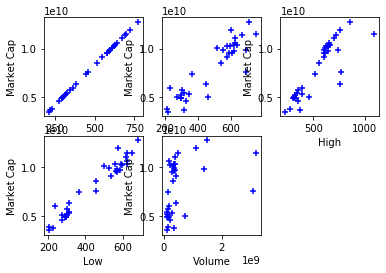

In [42]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(newdf.Open, newdf['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(newdf.Close, newdf['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(newdf.High, newdf['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(newdf.Low, newdf['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(newdf.Volume, newdf['Market Cap'],'Volume')

as we can see the Market Cap and Open have a linear relationship

In [44]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = newdf[['Open']]
Market_Cap  = newdf['Market Cap']

In [45]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Model Score
model.score(Open, Market_Cap)

0.9999801609861945

In [51]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
open = df[['Open']]
market_cap_predict = model.predict(open) 
df['Market Cap Predict'] = market_cap_predict.astype('int64')
df[df['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN,4859285818
2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN,5716421715
2017-07-30,385.14,385.14,316.25,345.66,606695,NaN,6358611246
2017-07-29,410.56,423.73,323.73,384.77,737815,NaN,6779561681
2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN,6383616563


#### 4. Data Visualization

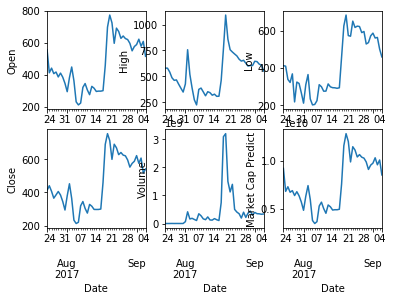

In [52]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap Predict'].plot()